In [1]:
pip install japanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 61.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for japanize_matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120257 sha256=641bbfa97fcc74dfa12b6002d2680f72220a7b29d4474373e95fbd0f84f3bd88
  Stored in directory: /root/.cache/pip/wheels/c1/f7/9b/418f19a7b9340fc16e071e89efc379aca68d40238b258df53d
Successfully built japanize_matplotlib


In [2]:
import glob
import pandas as pd
import numpy as np
import datetime as dt
import japanize_matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
files = glob.glob("/content/drive/MyDrive/Colab Notebooks/signate(お弁当の需要予測/train.csv")
files

['/content/drive/MyDrive/Colab Notebooks/signate(お弁当の需要予測/train.csv']

In [4]:
train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/signate(お弁当の需要予測/train.csv") # 学習データの読み込み
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/signate(お弁当の需要予測/test.csv') # 検証データの読み込み
sample = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/signate(お弁当の需要予測/sample.csv', header=None) # 提出用サンプルデータの読み込み

In [5]:
train

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-9-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-9-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-9-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-9-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6


In [30]:
test.shape

(40, 10)

In [7]:
sample

,0,1
0,2014-10-1,24
1,2014-10-2,71
2,2014-10-3,25
3,2014-10-6,32
4,2014-10-7,60
5,2014-10-8,44
6,2014-10-9,64
7,2014-10-10,33
8,2014-10-14,67
9,2014-10-15,28


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


In [9]:
# 数値データとオブジェクトデータに関する情報を合わせて表示
train.describe(include='all')

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
count,207,207.000000,207,207.000000,207,166.000000,21,14,10.0,207,207,207.000000
unique,207,NaN,5,NaN,156,NaN,6,2,NaN,7,8,NaN
top,2013-11-18,NaN,水,NaN,タンドリーチキン,NaN,お楽しみメニュー,ママの会,NaN,快晴,--,NaN
freq,1,NaN,43,NaN,6,NaN,12,9,NaN,53,169,NaN
mean,NaN,86.623188,NaN,0.449275,NaN,404.409639,NaN,NaN,1.0,NaN,NaN,19.252174
std,NaN,32.882448,NaN,0.498626,NaN,29.884641,NaN,NaN,0.0,NaN,NaN,8.611365
min,NaN,29.000000,NaN,0.000000,NaN,315.000000,NaN,NaN,1.0,NaN,NaN,1.200000
25%,NaN,57.000000,NaN,0.000000,NaN,386.000000,NaN,NaN,1.0,NaN,NaN,11.550000
50%,NaN,78.000000,NaN,0.000000,NaN,408.500000,NaN,NaN,1.0,NaN,NaN,19.800000
75%,NaN,113.000000,NaN,1.000000,NaN,426.000000,NaN,NaN,1.0,NaN,NaN,26.100000


<Axes: >

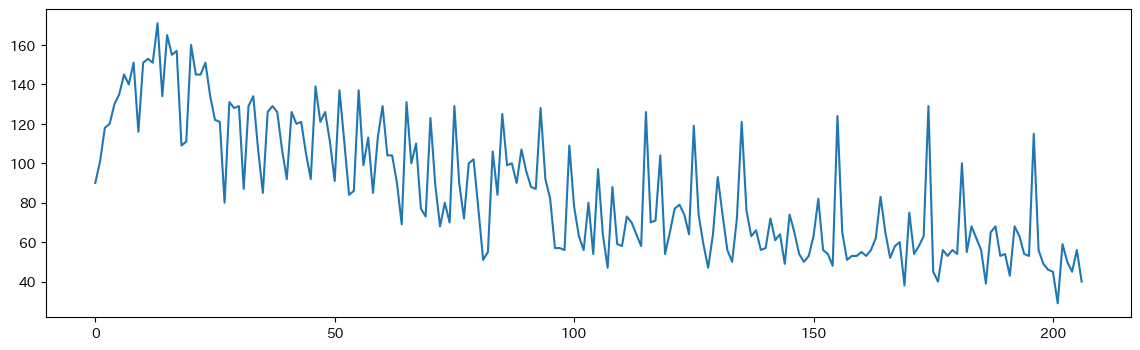

In [10]:
train['y'].plot(figsize=(14,4))

In [11]:
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


In [13]:
train['datetime'].value_counts()

,count
datetime,
2013-11-18,1
2013-11-19,1
2013-11-20,1
2013-11-21,1
2013-11-22,1
...,...
2014-9-24,1
2014-9-25,1
2014-9-26,1


In [14]:
def data_pre(df):
  # df.index = pd.to_datetime(df["datetime"])

  df['datetime'] = pd.to_datetime(df['datetime'])
  df['month'] = df['datetime'].dt.month
  # df = df.drop(['datetime'],axis=1)

  df['kcal'] = df['kcal'].fillna(df['kcal'].mean().astype(int))

  df['payday'] = df['payday'].fillna(0)
  df['remarks'] = df['remarks'].fillna('特になし')
  df['event'] = df['event'].fillna('なし')

  df.loc[df['precipitation'] == '--', 'precipitation'] = 0
  df['precipitation'] = pd.to_numeric(df['precipitation'])

  if 'name' in df.columns: # Check if 'name' column exists before dropping
    df = df.drop('name', axis=1)

  # object型をcategory型に変換
  for col in ["week", "remarks", "event", "weather", "precipitation"]:
    df[col] = df[col].astype("category")

  return df

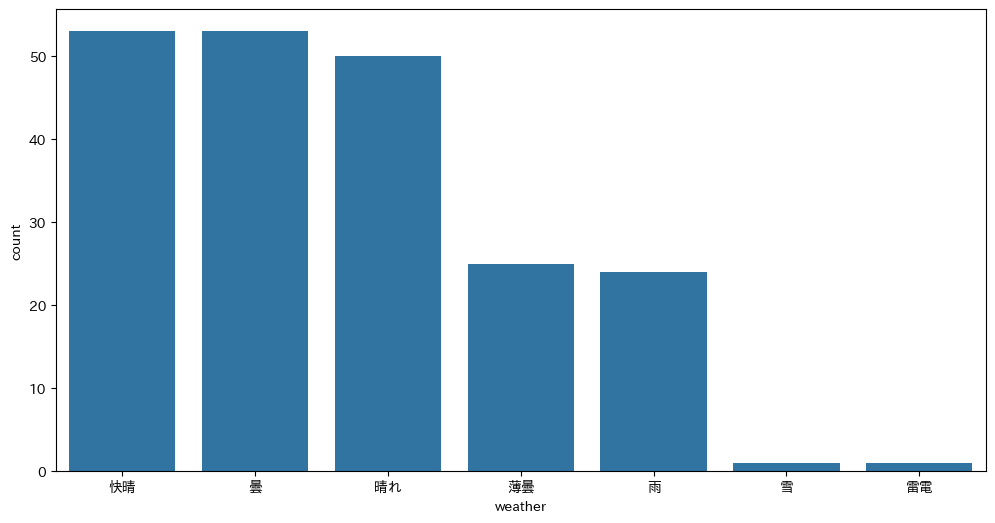

In [15]:
plt.figure(figsize=(12, 6))
sns.countplot(x='weather', data=train)
plt.show()

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       207 non-null    object 
 1   y              207 non-null    int64  
 2   week           207 non-null    object 
 3   soldout        207 non-null    int64  
 4   name           207 non-null    object 
 5   kcal           166 non-null    float64
 6   remarks        21 non-null     object 
 7   event          14 non-null     object 
 8   payday         10 non-null     float64
 9   weather        207 non-null    object 
 10  precipitation  207 non-null    object 
 11  temperature    207 non-null    float64
dtypes: float64(3), int64(2), object(7)
memory usage: 19.5+ KB


In [17]:
train = data_pre(train)
train = train.drop(['datetime'],axis=1)

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   y              207 non-null    int64   
 1   week           207 non-null    category
 2   soldout        207 non-null    int64   
 3   kcal           207 non-null    float64 
 4   remarks        207 non-null    category
 5   event          207 non-null    category
 6   payday         207 non-null    float64 
 7   weather        207 non-null    category
 8   precipitation  207 non-null    category
 9   temperature    207 non-null    float64 
 10  month          207 non-null    int32   
dtypes: category(5), float64(3), int32(1), int64(2)
memory usage: 11.4 KB


In [19]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
# 二乗平均平方誤差(RMSE)
from sklearn.metrics import mean_squared_error

In [20]:
# テストデータ80%、検証データ20%
df_train, df_val = train_test_split(train, test_size=0.2)

In [21]:
col = "y"
# テストデータ
# 目的変数
train_y = df_train[col]
# 説明変数
train_x = df_train.drop(col, axis=1)

# バリデーション（検証データ)
val_y = df_val[col]
val_x = df_val.drop(col, axis=1)

# LightGBM用のデータセットに変換
trains = lgb.Dataset(train_x, train_y)
valids = lgb.Dataset(val_x, val_y)

# パラメータ
params = {
    "objective": "regression",
    "metrics": "rmse"
}

# モデル構築
model = lgb.train(params, trains, valid_sets=valids, num_boost_round=1000, callbacks=[lgb.early_stopping(stopping_rounds=100)])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000317 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 123
[LightGBM] [Info] Number of data points in the train set: 165, number of used features: 9
[LightGBM] [Info] Start training from score 85.606061
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

In [22]:
# 評価用データ期間：2014年10月 1日 ～ 2014年11月30日
test = data_pre(test)
test = test.drop(['datetime'], axis=1) # Drop 'datetime' column from test DataFrame

In [23]:
test

,week,soldout,kcal,remarks,event,payday,weather,precipitation,temperature,month
0,水,1,420.0,特になし,なし,0.0,雨,0.0,20.2,10
1,木,0,415.0,特になし,なし,0.0,曇,0.0,23.9,10
2,金,0,405.0,特になし,なし,0.0,晴れ,0.0,28.7,10
3,月,1,400.0,特になし,なし,0.0,雨,0.5,21.5,10
4,火,0,430.0,特になし,なし,0.0,晴れ,0.0,22.1,10
5,水,0,420.0,特になし,なし,0.0,晴れ,0.0,23.3,10
6,木,0,435.0,特になし,キャリアアップ支援セミナー,0.0,曇,0.0,22.5,10
7,金,0,421.0,お楽しみメニュー,なし,1.0,薄曇,0.0,26.1,10
8,火,0,408.0,特になし,なし,0.0,快晴,0.0,26.8,10
9,水,1,450.0,料理長のこだわりメニュー,なし,0.0,雨,1.5,15.6,10


In [24]:
# 予測値を返す
pred = model.predict(test)
pred

array([ 56.11388432,  56.43942491,  52.99670748,  47.3287597 ,
        58.80996406,  52.69068117,  60.98361866,  49.50712067,
        47.90240237,  95.80548758,  60.35531582,  53.08569362,
        65.3597763 ,  54.95143131,  92.24831479, 100.4374438 ,
        68.21405739,  55.12881783,  70.16225313,  65.75715403,
        65.49198085,  68.59608603,  75.66508424, 127.3245228 ,
        68.37068311,  64.80266536,  57.05853894, 131.90422204,
       133.4148378 ,  51.9420315 , 127.3245228 , 134.28994875,
       125.30870103, 124.25365583, 129.39819162, 126.0904236 ,
       132.85752316, 143.75458855, 125.00937531, 126.70294458])

In [25]:
print(train.shape)
print(test.shape)
print(train.columns)
print(test.columns)

(207, 11)
(40, 10)
Index(['y', 'week', 'soldout', 'kcal', 'remarks', 'event', 'payday', 'weather',
       'precipitation', 'temperature', 'month'],
      dtype='object')
Index(['week', 'soldout', 'kcal', 'remarks', 'event', 'payday', 'weather',
       'precipitation', 'temperature', 'month'],
      dtype='object')


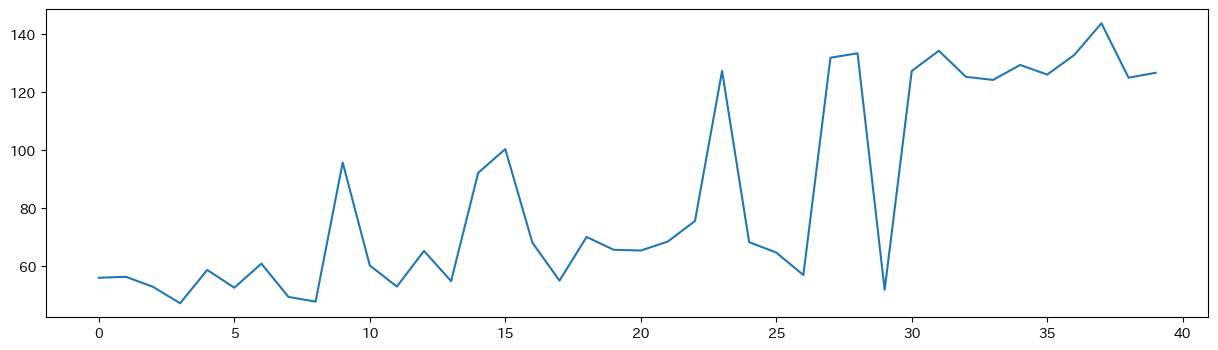

In [26]:
plt.figure(figsize=(15,4))
plt.plot(pred)

In [27]:
test

,week,soldout,kcal,remarks,event,payday,weather,precipitation,temperature,month
0,水,1,420.0,特になし,なし,0.0,雨,0.0,20.2,10
1,木,0,415.0,特になし,なし,0.0,曇,0.0,23.9,10
2,金,0,405.0,特になし,なし,0.0,晴れ,0.0,28.7,10
3,月,1,400.0,特になし,なし,0.0,雨,0.5,21.5,10
4,火,0,430.0,特になし,なし,0.0,晴れ,0.0,22.1,10
5,水,0,420.0,特になし,なし,0.0,晴れ,0.0,23.3,10
6,木,0,435.0,特になし,キャリアアップ支援セミナー,0.0,曇,0.0,22.5,10
7,金,0,421.0,お楽しみメニュー,なし,1.0,薄曇,0.0,26.1,10
8,火,0,408.0,特になし,なし,0.0,快晴,0.0,26.8,10
9,水,1,450.0,料理長のこだわりメニュー,なし,0.0,雨,1.5,15.6,10


In [28]:
sample[1] = pred
sample.to_csv('submit3.csv', index=None, header=None)

In [29]:
sample

,0,1
0,2014-10-1,56.113884
1,2014-10-2,56.439425
2,2014-10-3,52.996707
3,2014-10-6,47.328760
4,2014-10-7,58.809964
5,2014-10-8,52.690681
6,2014-10-9,60.983619
7,2014-10-10,49.507121
8,2014-10-14,47.902402
9,2014-10-15,95.805488
